## Imports

In [94]:
import pandas as pd
import numpy as np

from nltk.tokenize import sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

from scipy.stats import ranksums

import matplotlib.pyplot as plt

## Data loading and Preprocessing

In [95]:
# Load data from .csv files
before_df = pd.read_csv("Pre-COVID.csv", sep='\t')
after_df = pd.read_csv("In-COVID.csv", sep='\t')

df_dict = {'before' : before_df,
           'after' : after_df}

In [96]:
# Filter out none english tweets.
for key, df in df_dict.items():
    english = df["language"] == "en"
    duplicates = df.duplicated('tweet')

    keep = english & (~ duplicates)

    df_dict[key] = df[keep].copy()
    print(f'{sum(keep)} / {len(df)} tweets are maintained in the {key} dataset.')

61118 / 69869 tweets are maintained in the before dataset.
59110 / 66725 tweets are maintained in the after dataset.


In [97]:
# Detect tweets related to jobs
for key, df in df_dict.items():
    df['job_tweet'] = df['tweet'].map(lambda t: ("job" in t) or ("hire" in t))
    print(f"Job tweets {key}: {df['job_tweet'].sum()}")

Job tweets before: 2228
Job tweets after: 2640


## Sentiment Analysis

In [98]:
sia = SentimentIntensityAnalyzer()

def analyse_sentiment(text, sentiment_type):
    return np.mean([sia.polarity_scores(sentence)[sentiment_type] for sentence in sent_tokenize(text)])

In [99]:
for df in df_dict.values():
    for sentiment_type in  ['neg', 'neu', 'pos', 'compound']:
        df["sentiment_" + sentiment_type] = df["tweet"].map(lambda t: analyse_sentiment(t, sentiment_type))

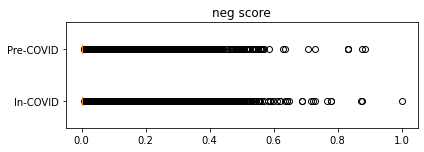

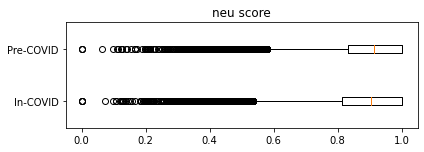

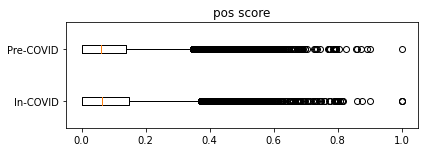

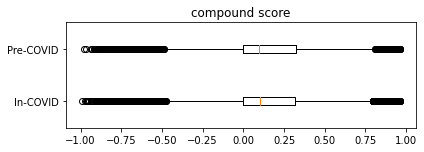

############################################################################


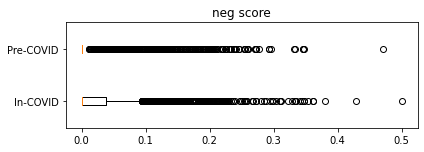

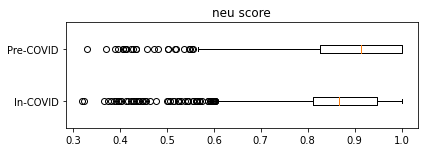

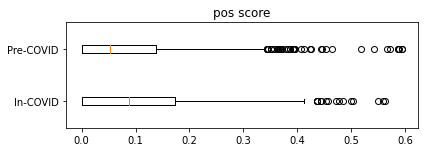

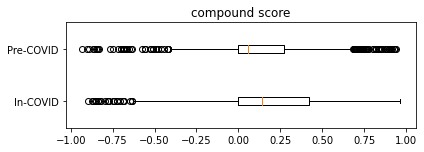

In [100]:
def sentiment_boxplot(before_df, after_df, file_prefix):
    for sentiment_type in ['neg', 'neu', 'pos', 'compound']:
        plt.figure(figsize=(6,2))

        plt.boxplot([after_df['sentiment_' + sentiment_type], before_df['sentiment_' + sentiment_type]], labels=["In-COVID", "Pre-COVID"], vert=0)
        plt.tight_layout()
        plt.savefig(f"plots/{file_prefix}_{sentiment_type}.pdf")
        plt.title(f"{sentiment_type} score")
        plt.show()

# All tweets

sentiment_boxplot(df_dict['before'], df_dict['after'], 'main')


print("############################################################################")

# Job related tweets
sentiment_boxplot(df_dict['before'][df_dict['before']['job_tweet']], df_dict['after'][df_dict['after']['job_tweet']], 'job')

## Statistics

In [101]:
# All tweets
for sentiment_type in ['neg', 'neu', 'pos', 'compound']:
    print(sentiment_type)
    print(f"before: {np.mean(df_dict['before']['sentiment_' + sentiment_type])} vs after: {np.mean(df_dict['after']['sentiment_' + sentiment_type])}")
    print(ranksums(df_dict['before']['sentiment_' + sentiment_type], df_dict['after']['sentiment_' + sentiment_type]))
    print()

neg
before: 0.017085945398613515 vs after: 0.023884566490161175
RanksumsResult(statistic=-16.3961128248065, pvalue=2.0387283318087154e-60)

neu
before: 0.8905952387674445 vs after: 0.8788331747819164
RanksumsResult(statistic=17.720297809546565, pvalue=2.92360521814055e-70)

pos
before: 0.08612633768514318 vs after: 0.09162597104576017
RanksumsResult(statistic=-8.881286835009188, pvalue=6.609128788603867e-19)

compound
before: 0.15827887521117817 vs after: 0.15121411723209366
RanksumsResult(statistic=2.971232273672997, pvalue=0.002966073584590856)



In [102]:
# Job related tweets
for sentiment_type in ['neg', 'neu', 'pos', 'compound']:
    print(sentiment_type)
    print(f"before: {np.mean(df_dict['before'][df_dict['before']['job_tweet']]['sentiment_' + sentiment_type])} vs after: {np.mean(df_dict['after'][df_dict['after']['job_tweet']]['sentiment_' + sentiment_type])}")
    print(ranksums(df_dict['before'][df_dict['before']['job_tweet']]['sentiment_' + sentiment_type], df_dict['after'][df_dict['after']['job_tweet']]['sentiment_' + sentiment_type]))
    print()

neg
before: 0.021924834181129064 vs after: 0.030365094246031746
RanksumsResult(statistic=-4.493986490989087, pvalue=6.990206470180851e-06)

neu
before: 0.8925849578595652 vs after: 0.8619298318001443
RanksumsResult(statistic=11.127423615065455, pvalue=9.226374550818844e-29)

pos
before: 0.08226913204240403 vs after: 0.10239631493506493
RanksumsResult(statistic=-8.716657529938763, pvalue=2.865351939188407e-18)

compound
before: 0.1285793519884016 vs after: 0.16351401515151515
RanksumsResult(statistic=-5.804128268674446, pvalue=6.470173293738307e-09)

